In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [24]:
path_to_img = "/content/drive/MyDrive/Colab Notebooks/gender_and_blur/man_woman.jpg"
image = cv2.imread(path_to_img)
img_2 = image.copy()
img_3 = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [25]:
cas_path = '/content/drive/MyDrive/Colab Notebooks/gender_and_blur/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cas_path)

In [26]:

faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor = 1.35,
    minNeighbors = 5,
    minSize = (30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
  )

In [27]:
def determine_gender(img_arr):
    img = img_arr
    img = img.reshape(1, 224, 224, 3)
    # l_model = load_model('gender_face_model.h5')
    l_model = load_model('/content/drive/MyDrive/Colab Notebooks/gender_and_blur/EfficientNetB1-gender-98.00.h5') # loads premade model
    result = l_model.predict(img)
    print("Model result: ", result)
    result = np.argmax(result)
    print("Model result: ", result)

    if result == 0:
        return 0
    elif result == 1:
        return 1

In [28]:
print('Found {0} faces!'.format(len(faces)))

for(x, y, w, h) in  faces:
    x2 = x+w
    y2 = y+h
    cv2.rectangle(img_2, (x, y), (x2, y2), (0, 0, 0), 2)
    crop = image.copy()
    tp = y+2 # top most point of height in the box
    bp = y2-2 # bottom most point in the box
    lp = x+2 # left most point in the box
    rp = x2-2 # right most point in the box
    crop = crop[tp:bp, lp:rp] # crops the section of the image where the detected face is located
    resized_img = cv2.resize(crop, (224,224))
    img_3 = resized_img
    array_img = img_to_array(resized_img) # converts image to array in order to be passed through a function
    g_result = determine_gender(array_img) # return 0 if face is female, 1 if face is male
    gender_label = "_"
    g_color = (255,255,255)
    if g_result == 0:
        gender_label = "Female"
        g_color = (255, 0, 0)
    elif g_result == 1:
        gender_label = "Male"
        g_color = (0, 0, 255)
    img_2 = cv2.putText(img_2, gender_label, (x, y-2), cv2.FONT_HERSHEY_SIMPLEX, 1, g_color, 2, cv2.LINE_AA)

Found 2 faces!
1/1 [==============================] - 2s 2s/step
Model result:  [[0.02308746 0.9769125 ]]
Model result:  1
1/1 [==============================] - 2s 2s/step
Model result:  [[0.9647503  0.03524969]]
Model result:  0


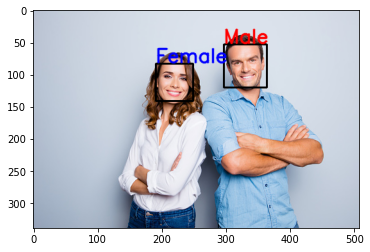

In [29]:
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_2)